# Assessment of Data and Applying Normalization on Abalone Dataset

## Libraries Utilized:
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit-learn 

## Importing Libraries 

In [1]:
import pandas as pd
import random
import seaborn as sns
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn import neighbors, datasets, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

## Loading the Abalone Dataset

In [2]:
N = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight','Rings']
df1 = pd.read_csv("abalone.csv", sep=',',names = ['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight','Rings'])

## Exploring the features, their ranges and distribution

In [3]:
df1.head(5)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We can see that all of the attributes, with the exception of "Sex," are numerical in nature. Sex is a categorical variable with three potential outcomes. We will tackle that with a one hot encoding. The labels are all of the integer type 


## Missing data

In [4]:
df1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As seen from the above table, it is clear that our data does not contain missing values. This is clear from the fact that count of all the features are the same. Further evidence for this is shown below. </span>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


As we can see, it is clear that there are no null values in each feature.

## Handling Categorical features using One Hot Encoding

In [6]:
#one hot encoding
one_hot_enc = pd.get_dummies(df1.Sex, prefix='Sex')
df1['Sex_F'] = one_hot_enc['Sex_F']
df1['Sex_I'] = one_hot_enc['Sex_I']
df1['Sex_M'] = one_hot_enc['Sex_M']
df1 = df1.drop(columns = ["Sex"])

Here, we are performing one hot encoding of the feature "Sex" so that it is easier for us to handle. On that note, we split Sex into 3 distinct features (Male,Female,Infant)

In [7]:
df1.isna().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

## Performing Min-Max Normalization on Abalone Dataset
Min-max normalization is used to scale the data such that the minimum value of the feature is set to 0 and the maximum value of the feature is set to 1

In [8]:
#min-max normalization
df1_minmax= df1[:].copy()
for d in df1_minmax[:]:
    if d in ['Rings']:
        continue
    df1_minmax[d] = (df1_minmax[d] - df1_minmax[d].min()) / (df1_minmax[d].max() - df1_minmax[d].min())

# Improving KNN with Min-Max Normalization
## Data preparation

Performing K-NN classfier using Defaults values, Manhattan distance & Euclidean distance to derive k-value of the best performance 

In [9]:
X = df1_minmax
drop_columns = ['Rings']
y = df1['Rings']
X = X.drop(columns = drop_columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

Best performance is  26.913875598086122  at k = 34 | weights = Distance | distance = Manhattan


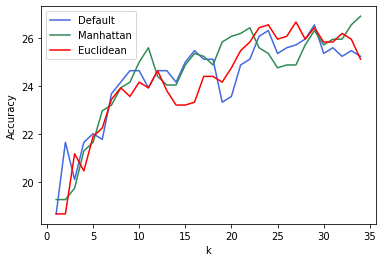

In [10]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(1,35))
mm_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    mm_acc_default.append(accuracy)
plt.plot(k_list, mm_acc_default,color="royalblue")


#KNN for Manhatten distance
mm_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'Distance'
    mm_acc_manhatten.append(accuracy)
plt.plot(k_list, mm_acc_manhatten,color="seagreen")



#KNN for Euclidean distance
mm_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Distance'
    mm_acc_euclidean.append(accuracy)
plt.plot(k_list, mm_acc_euclidean,color="red")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

Using Manhattan Distance metric we get the highest accuracy of 26.91% for K=34. Manhattan Distance is used to calculate the distance between two data points in a grid-like path

## Best performing KNN configuration

Selecting the Best Value for K which provides best accuracy scores

In [11]:
knn = KNeighborsClassifier(n_neighbors=34, weights = 'distance', p = 1, metric ='minkowski')
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(accuracy)

26.913875598086122


The value K=34 provides an overall accuracy of 26.91

# 1.Representation Learning

## PCA

PCA is an unsupervised method of dimensionality reduction technique hence, we drop the target variables and carry out PCA on the remaining 7 attributes to find principal components that capture the variances in the given data.

Text(0.5, 1.0, 'Scree plot')

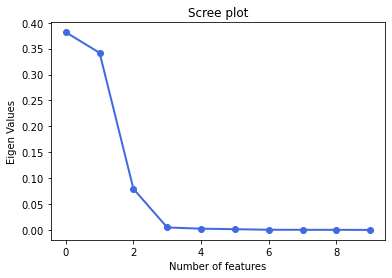

In [12]:
pca_model = PCA()
pca_model.fit(X_train)
fig = plt.figure(figsize=(6,4))
plt.plot(pca_model.explained_variance_ ,'o-', linewidth=2, color='royalblue')
plt.xlabel("Number of features")
plt.ylabel("Eigen Values")
plt.title("Scree plot")


The above plot indicates the Eigen values w.r.t number of features. As the number of Features increases the Eigen value decreased and reached solidity beyond 3 features.

The scree plot is a plot between the number of features and the magnitude of the eigen values which explains the quantum of spread along a particular principle component. Based on this plot, it is clear that the amount of spread explained quickly tends to zero. This is quite useful for us, since  this shows that we can drop majority of the dimensions and still be able to explain much of the data. 

[0.93686675 0.03205275]


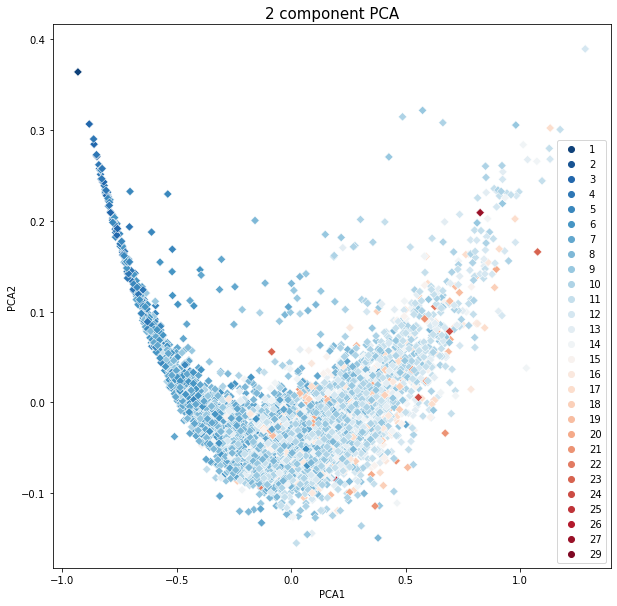

In [13]:
D = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
pca_model_2dims = PCA(n_components=2)
pca_model_2dims.fit(X_train[D])
X2d = pca_model_2dims.transform(X[D])
df_2d_pca = pd.DataFrame(X2d, columns = ["PCA1", "PCA2"])
df_2d_pca["Label"] = df1["Rings"]
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x = df_2d_pca["PCA1"].values, y = df_2d_pca["PCA2"].values, marker ="D" , hue = df_2d_pca["Label"].values, palette = sns.color_palette('RdBu_r', 28))
plt.xlabel('PCA1', fontsize = 10)
plt.ylabel('PCA2', fontsize = 10)
plt.title('2 component PCA', fontsize = 15)
print(pca_model_2dims.explained_variance_ratio_)

From the plot we observe that first principal component is responsible for maximum variance. With principle component PCA1 we are able to explain close to 93% of the data and 3% with principle component PCA2. This is an attractive trade-off!

## TSNE

T-SNE is another dimensionality reduction concept that is well suited to effectively visualize high dimensional data. Since us humans can visualize and discern data in a 2-D or 3-D space plots the natural choice for dimension is either 2 or 3. For our experimentation, we'll primarily be using n_components set at 2 because of the following reasons,

It is convenient to visualize and analyze points in a 2D plots

Easy to work with 2D plots without having to expend too much on computing

We can notice a decent amount of grouping of same class data points where local neighbourhood information is preserved.

<AxesSubplot:title={'center':'2 component TSNE'}, xlabel='TSNE1', ylabel='TSNE2'>

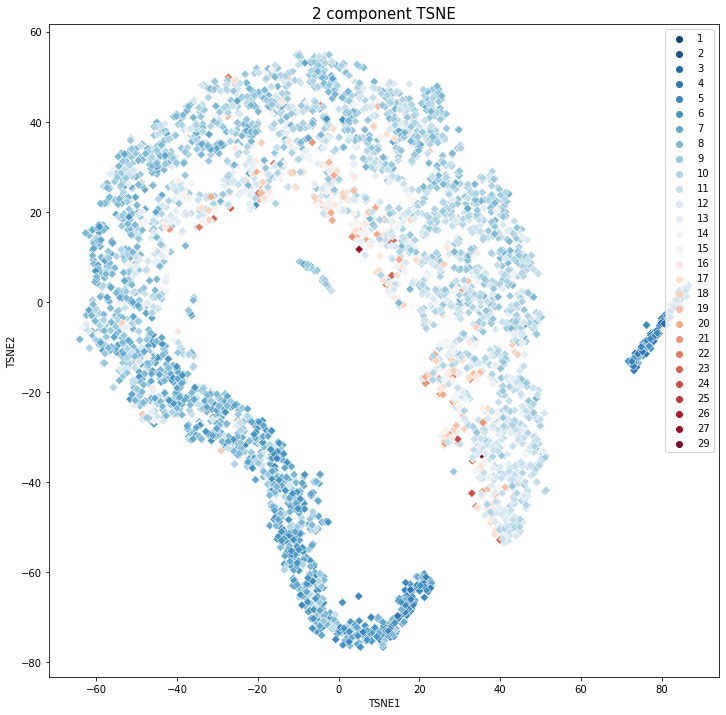

In [14]:
D = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

tsne_2d = TSNE(n_components=2)
X2d_tsne = tsne_2d.fit_transform(X[D])

df_2d_tsne = pd.DataFrame(X2d_tsne, columns = ["TSNE1","TNSE2"])
df_2d_tsne["Label"] = df1["Rings"]
fig = plt.figure(figsize = (12,12))
plt.xlabel('TSNE1', fontsize = 10)
plt.ylabel('TSNE2', fontsize = 10)
plt.title('2 component TSNE', fontsize = 15)
sns.scatterplot(x = df_2d_tsne["TSNE1"].values, y = df_2d_tsne["TNSE2"].values, hue = df_2d_tsne["Label"].values, marker = 'D' , palette = sns.color_palette('RdBu_r', 28))


Feature of t-SNE is a tuneable parameter, “perplexity,” which says how to balance attention between local and global aspects of your data. The parameter is a guess about the number of close neighbors each point has. The results of the T-SNE shows evident grouping between classes.

## LDA

Linear Discriminant Analysis (LDA) is a supervised approach for identifying the linear discriminants that reflect the axes that optimise separation between various classes. Each class is given a Gaussian density by the model, which assumes that all classes have the same covariance matrix.

Since the labels in the dataset are unbalanced,  Rings is the most balanced continous datset, so it should be easier to train and hence we get better results with LDA. 

<AxesSubplot:title={'center':'2 component LDA'}, xlabel='LDA1', ylabel='LDA2'>

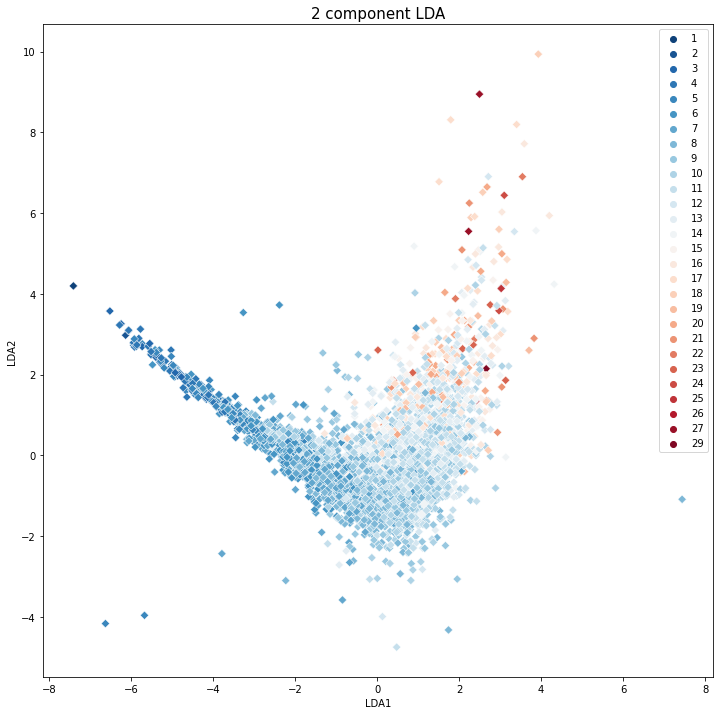

In [15]:
D = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

lda_2d = LDA(n_components=2)
X2d_lda = lda_2d.fit_transform(X[D], y = y)

df_2d_lda = pd.DataFrame(X2d_lda, columns = ["LDA1", "LDA2"])
df_2d_lda["Label"] = df1["Rings"]
fig = plt.figure(figsize = (12,12))
plt.xlabel('LDA1', fontsize = 10)
plt.ylabel('LDA2', fontsize = 10)
plt.title('2 component LDA', fontsize = 15)
sns.scatterplot(x = df_2d_lda["LDA1"].values, y = df_2d_lda["LDA2"].values, hue = df_2d_lda["Label"].values,marker ="D", palette = sns.color_palette("RdBu_r", 28))



LDA focuses on the seperation of the different classes and it is evident in the above plot.

## KNN performance by varying dimensions in PCA

Text(0, 0.5, 'Accuracy')

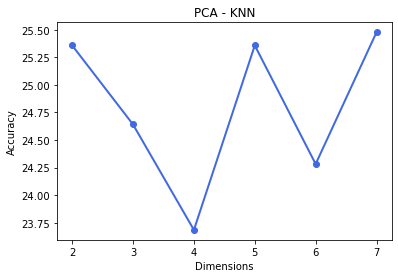

In [16]:
dims = []
acc = []
for d in range(2,len(D)+1):
    dims.append(d)
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train[D])
    Xnew = pca_model.transform(X[D])
    Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=0.2,random_state=27)
    
    knn = KNeighborsClassifier(n_neighbors=24, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(Xtrain, ytrain.values.ravel())
    y_pred = knn.predict(Xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)*100
    acc.append(accuracy)

plt.plot(dims,acc,'o-', linewidth=2, color='royalblue')
plt.title("PCA - KNN")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")

For 2 number of dimensions we get maximum accuracy of 25.35%. We opt for the lower dimensions rather than higher dimensions since we can save computational expenses.

## KNN performance by varying dimensions in LDA

Text(0, 0.5, 'Accuracy')

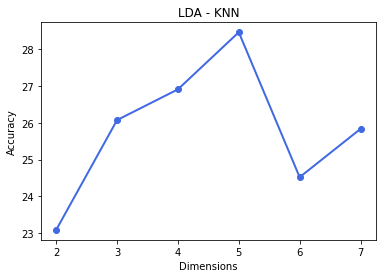

In [17]:
dims = []
acc = []
for d in range(2,len(D)+1):
    dims.append(d)
    lda_model = LDA(n_components=d)
    Xnew = lda_model.fit_transform(X[D], y = y)
    Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=0.2,random_state=27)
    
    knn = KNeighborsClassifier(n_neighbors=24, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(Xtrain, ytrain.values.ravel())
    y_pred = knn.predict(Xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)*100
    acc.append(accuracy)

plt.plot(dims,acc,'o-', linewidth=2, color='royalblue')
plt.title("LDA - KNN")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")

For 5 number of dimensions we get maximum accuracy of 28.5%

## Dataset - Abalone

In [18]:
pca_dim = 5
lda_dim = 5
pca_model = PCA(n_components = pca_dim)
lda_model = LDA(n_components = lda_dim)

# Raw data
X_raw = X.to_numpy()
y_raw = y.to_numpy()

#Best PCA
X_pca = pca_model.fit_transform(X)

#Best LDA
X_lda = lda_model.fit_transform(X,y)

# 2. Naive Bayes

## Multinomial NB 

Original Feature Space is used for this classification.
Hyper parameter tuning is performed using 5-fold cross validation on each label.

Naive Bayes classifier which uses a multinomial distribution for each of the features is Multinomial NB. It is inefficient when the datasets are imbalanced. 

### <font color='royalblue'>Multinomial NB | Raw  Abalone Dataset

In [19]:
kf = KFold(n_splits=5, random_state=26, shuffle = True)
acc = []
for train_idx, test_idx in kf.split(X_raw,y_raw):
    xtrain = X_raw[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_raw[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
   
    
    
print("Multinomial NB | Raw dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Multinomial NB | Raw dataset | Abalone | Accuracy :  21.33106036730367


### <font color='royalblue'> Multinomial NB | PCA  Abalone Dataset

In [20]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca_scaled = scaler.transform(X_pca)
for train_idx, test_idx in kf.split(X_pca_scaled,y_raw):
    xtrain = X_pca_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_pca_scaled[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Multinomial NB | PCA dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Multinomial NB | PCA dataset | Abalone | Accuracy :  16.83075953356445


### <font color='royalblue'> Multinomial NB | LDA Abalone Dataset

In [21]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_lda)
X_lda_scaled = scaler.transform(X_lda)
for train_idx, test_idx in kf.split(X_lda_scaled,y_raw):
    xtrain = X_lda_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_lda_scaled[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Multinomial NB | LDA dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Multinomial NB | LDA dataset | Abalone | Accuracy :  16.49545884307939


## Complement NB 

Complement NB is efficient when the datasets are imbalanced and can be considered as an adaptation of the multinomial naive bayes where the datapoints belonging to all classes are calculated. 

### <font color='royalblue'> Complement NB | Raw Abalone dataset

In [22]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
for train_idx, test_idx in kf.split(X_raw,y_raw):
    xtrain = X_raw[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_raw[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | Raw dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | Raw dataset | Abalone | Accuracy :  18.38661433114632


### <font color='royalblue'>Complement NB | PCA Abalone dataset

In [23]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca_scaled = scaler.transform(X_pca)
for train_idx, test_idx in kf.split(X_pca_scaled,y_raw):
    xtrain = X_pca_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_pca_scaled[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | PCA dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | PCA dataset | Abalone | Accuracy :  17.261152336475373


### <font color='royalblue'>Complement NB | LDA Abalone dataset

In [24]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_lda)
X_lda_scaled = scaler.transform(X_lda)
for train_idx, test_idx in kf.split(X_lda_scaled,y_raw):
    xtrain = X_lda_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_lda_scaled[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | LDA dataset | Abalone | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | LDA dataset | Abalone | Accuracy :  21.49889694295619


Multinomial naive bayes outperforms complement naive bayes with the raw abalone dataset. However, The complement naive bayes outperforms the multinomial naive bayes with LDA,PCA dataset. This may be contradictory to the fact that complement NB performs better with unbalanced dataset in this scenario owing to the following reasons:
1. Nature of the datasets
2. Non-Removal of Outliers (as per instruction)
3. Z-scaling could not be performed due to occurances of negative values. Hence, Min-Max scaling was performed. Min-Max scaling without removal of outliers might have bad effects.



# 3. Decision Tree Classfication

1. Original Feature Space is used for this classification
2. Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for Max Depth

{'max_depth': 4}
0.26817665118194106


Text(0, 0.5, 'Accuracy')

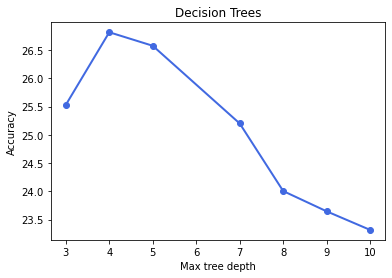

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

plt.title("Decision Trees")
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score']*100,'o-', linewidth=2, color='royalblue')
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")

Therefore, Max Depth value of 4 gives the best accuracy of 26.80%.
When increasing the maximum depth after the value 5, the accuracy decreases as the Tree depth increases.

25.358851674641148


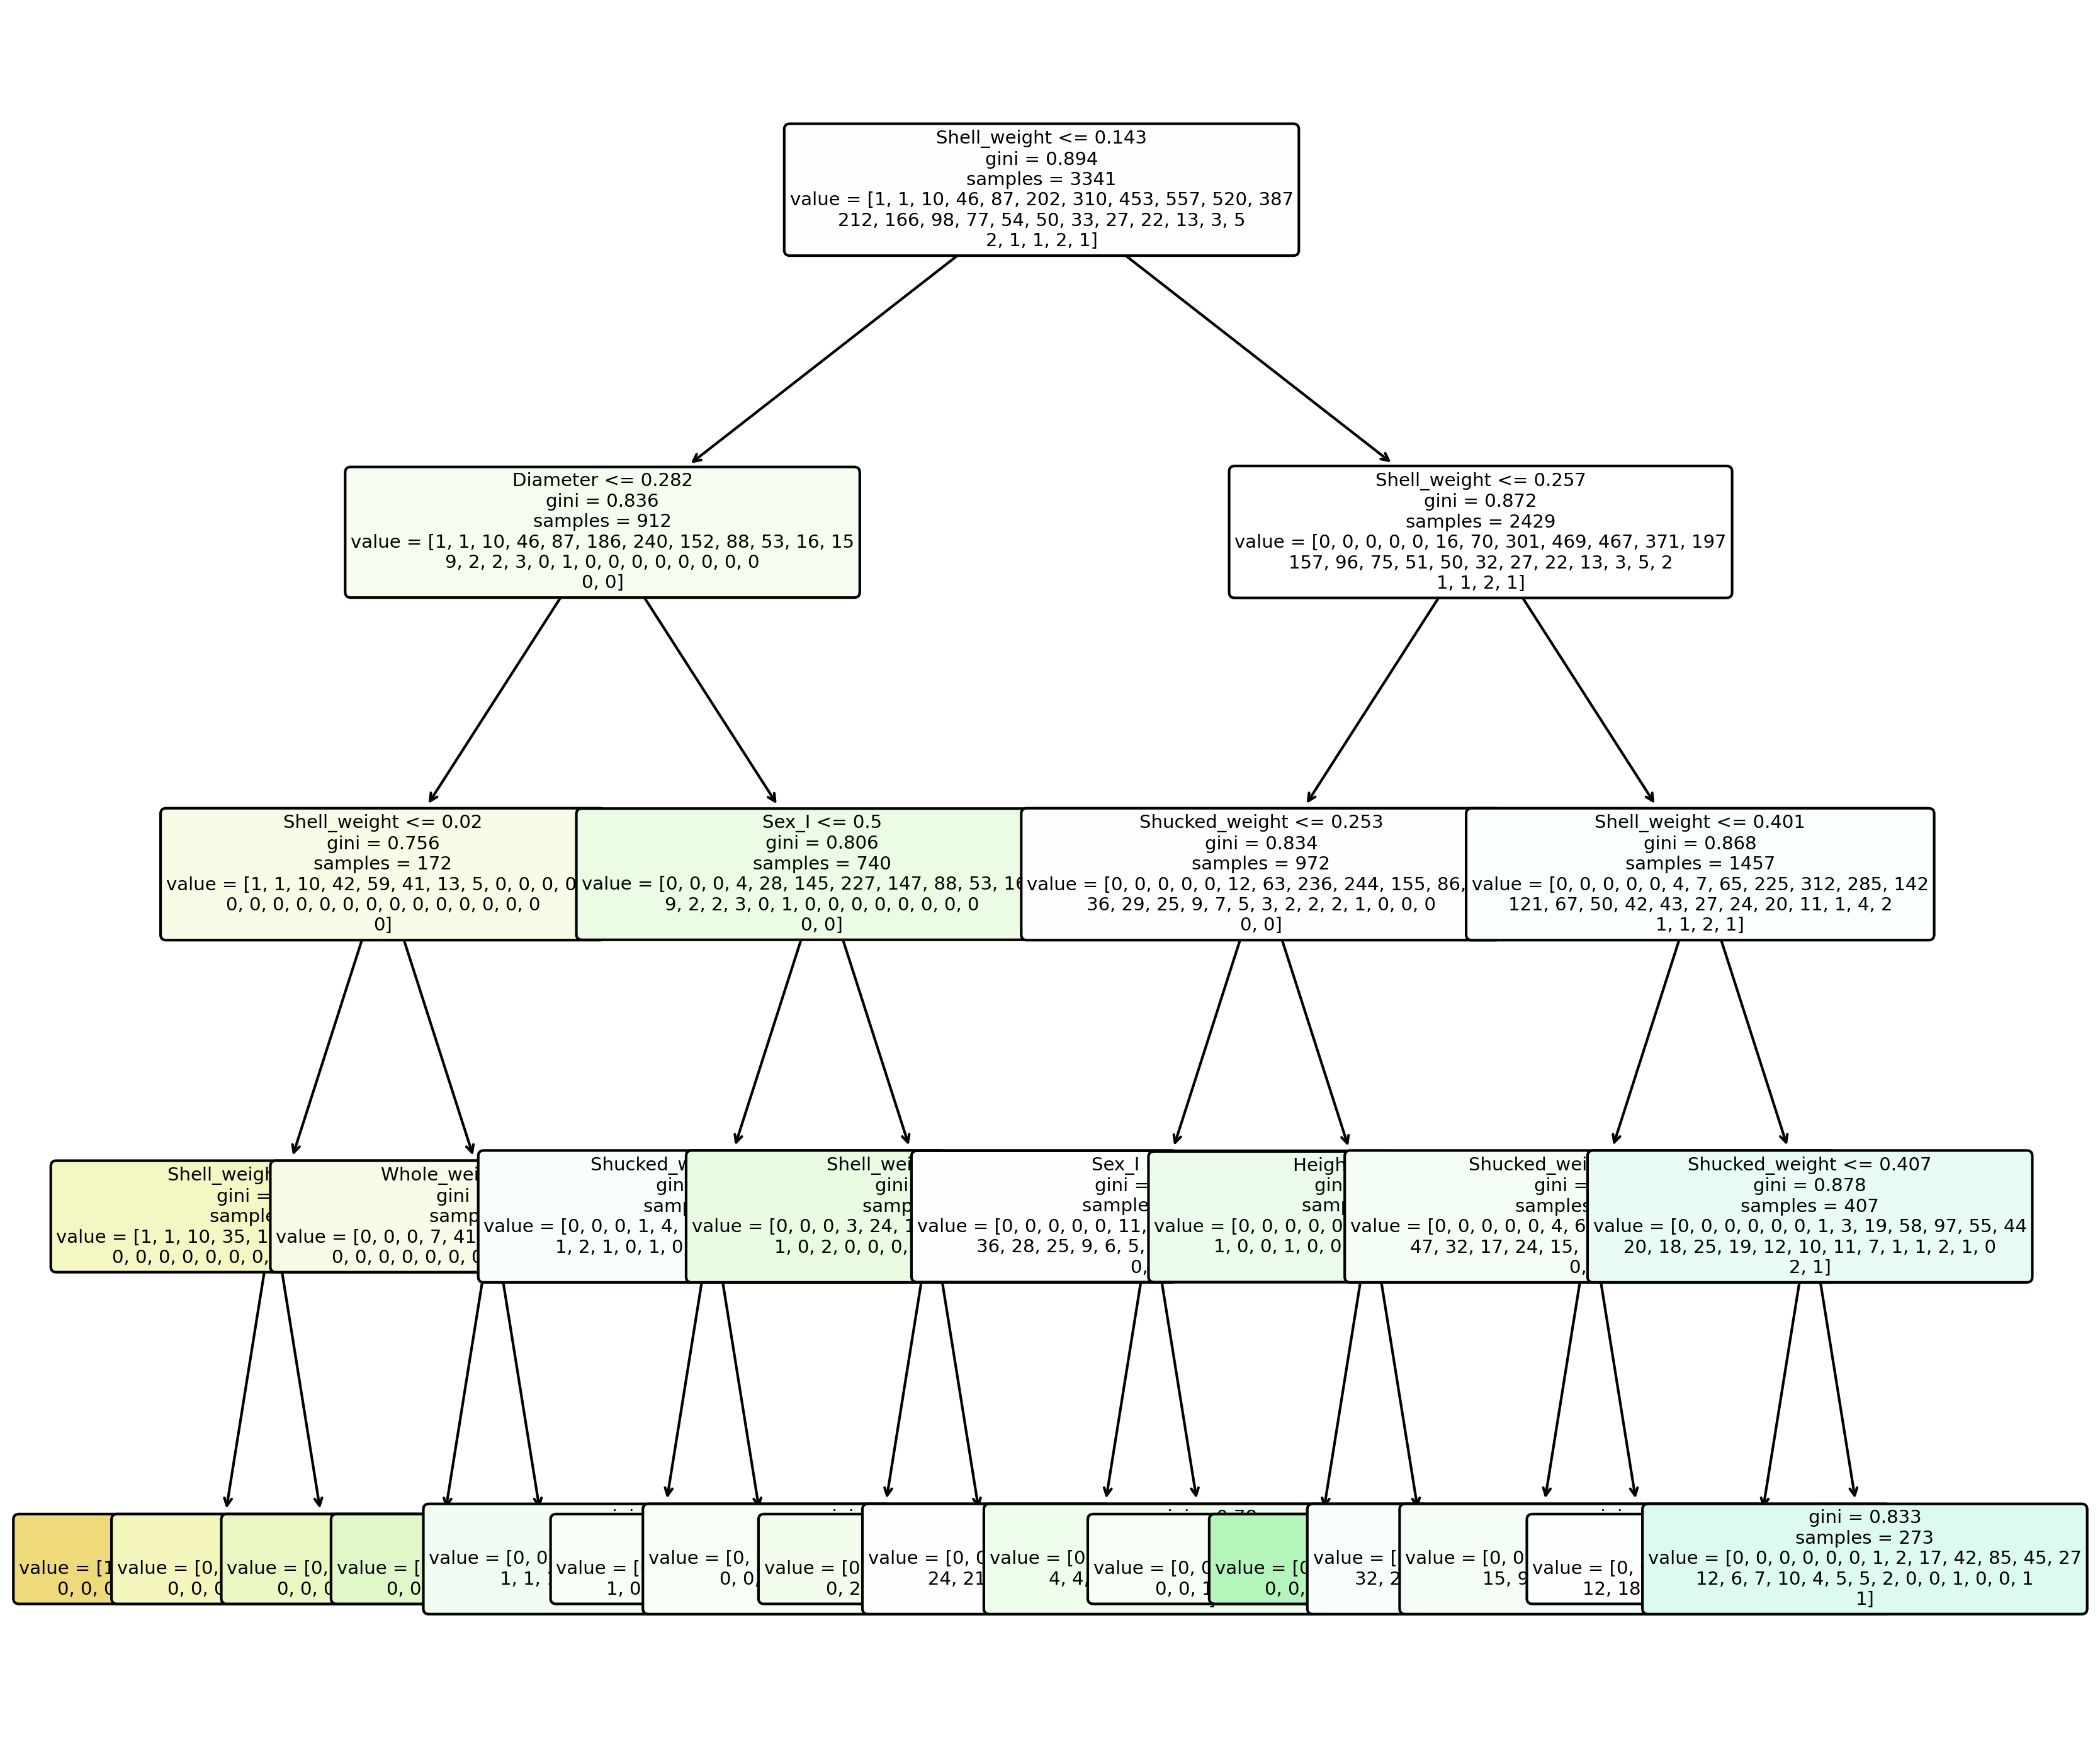

In [26]:
from sklearn import tree
dtree = DecisionTreeClassifier(random_state=27, max_depth = 4)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print(accuracy)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(dtree,feature_names=list(X.columns),filled=True,fontsize=7,rounded=True)
#plt.figure()
plt.show()

### Interpretability: ###
We can observe from the splitting pattern that, Gini Impurity is preferred to Information Gain because it does not contain logarithms which are computationally intensive.
For each split, the Gini Impurity of each child node is individually calculated. The split with the lowest value of Gini Impurity is selected. We can observe that the root node was first split at Shell_weight <=0.143 and gini impurity value of 0.894.Next split is at Diameter <= 0.282 on the left and Shell_weight <= 0.257 on the right which is further split into Shell_weight, Shucked_weight and Sex. The splitting is unbalanced with more splitting and branching on the right side of root node than the left This splitting continues similarly until each of the resulting child nodes end up with 2 leaf nodes or 1 leaf node. In the final splitting, the pattern that can be observed is that the final child node splits are either on Shell_weight, Whole_weight, Shucked_weight, Height and Sex on every branch. An interesting observation is that these 7 features were the subset of features selected to perform PCA.

Decision Trees take a shorter time to compute morever the decision tree can prove substantially why the predictions are in a particular manner by tracing the tree unlike in PCA where the contextual information is lost in the process.




### <font color='royalblue'>Decision Tree | PCA ABALONE DATASET

1. Original Feature Space is used for this classification
2. Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for Max Depth

{'max_depth': 4}
0.2520170421488861


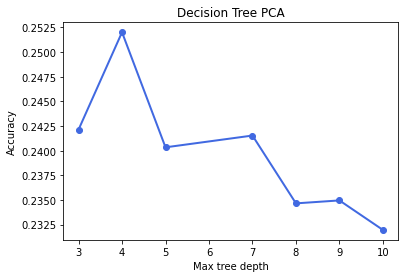

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
plt.title("Decision Tree PCA")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score'], 'o-', linewidth=2, color='royalblue')

dtree = DecisionTreeClassifier(random_state=27, max_depth = 4)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100

With the above plot Max Depth value of 4 gives the best accuracy of 25.20%.
When increasing the maximum depth after the value 4, the accuracy decreases till tree depth of 5 and there is a slight increase in accuracy for Tree depth value of 7 after which the accuracy score goes on decreasing with increasing depth of tree

### <font color='royalblue'>Decision Tree | LDA ABALONE DATASET

1. Original Feature Space is used for this classification
2. Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for Max Depth

{'max_depth': 3}
0.2568114891293646
Test Accuracy is  25.837320574162682


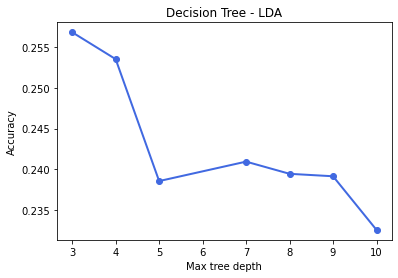

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
plt.title("Decision Tree - LDA")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score'], 'o-', linewidth=2, color='royalblue')

dtree = DecisionTreeClassifier(random_state=27, max_depth = 4)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

With the above plot Max Depth value of 3 gives the best accuracy of 25.83%.
When increasing the maximum depth after the value 4, the accuracy decreases as the Tree depth increases

# 4. Random Forest Classification

Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for number of trees and Max Depth

{'max_depth': 5, 'n_estimators': 50}
Best CV score is  0.2702755923131316


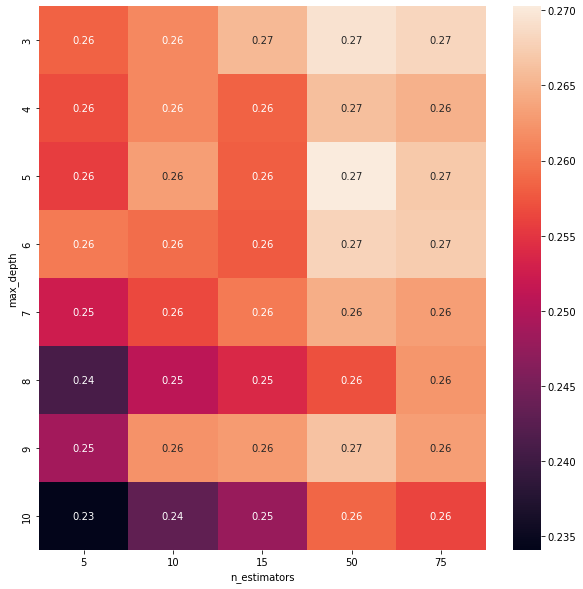

In [29]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [30]:
dtree = RandomForestClassifier(random_state=27, max_depth = 5, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  27.631578947368425


We can conclude from the heat map that max depth of 5 with 50 n-estimators provides the best accuracy of 27.63%

### <font color='royalblue'> Random Forest Classification | PCA Abalone dataset </font> 

{'max_depth': 5, 'n_estimators': 15}
Best CV score is  0.2732785549976281


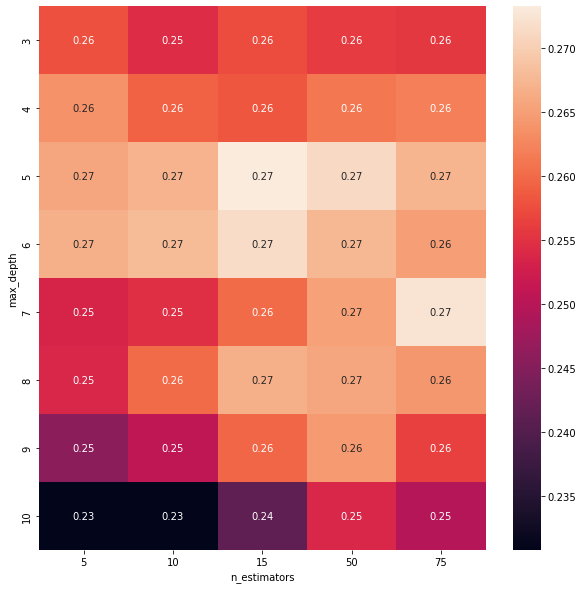

In [31]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [32]:
dtree = RandomForestClassifier(random_state=27, max_depth = 5, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  26.435406698564595


We can conclude from the heat map that max depth of 5 with 15 n-estimators provides the best accuracy of 26.43%

### <font color='royalblue'> Random Forest Classification | LDA Abalone dataset   </font> 

{'max_depth': 4, 'n_estimators': 75}
Best CV score is  0.2669884446353929


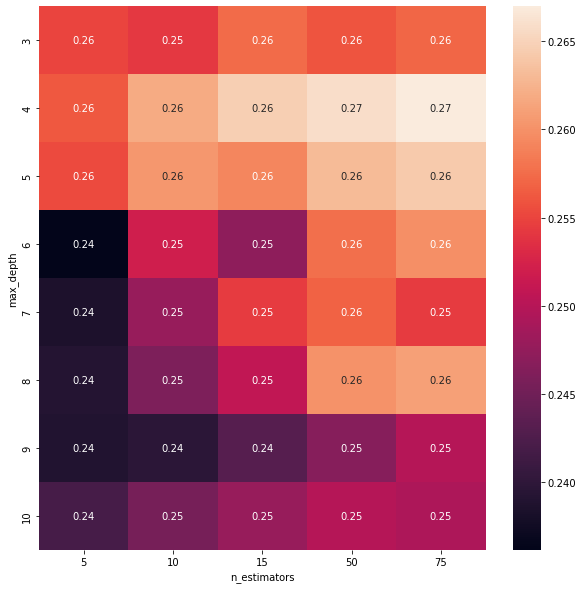

In [33]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [34]:
dtree = RandomForestClassifier(random_state=27, max_depth = 5, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  26.913875598086122


We can conclude from the heat map that max depth of 5 with 75 n-estimators provides the best accuracy of 26.91%

# 5.Gradient Boosting

Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for number of estimators

{'max_depth': 3, 'n_estimators': 5}
Best CV score is  0.25859939314196717


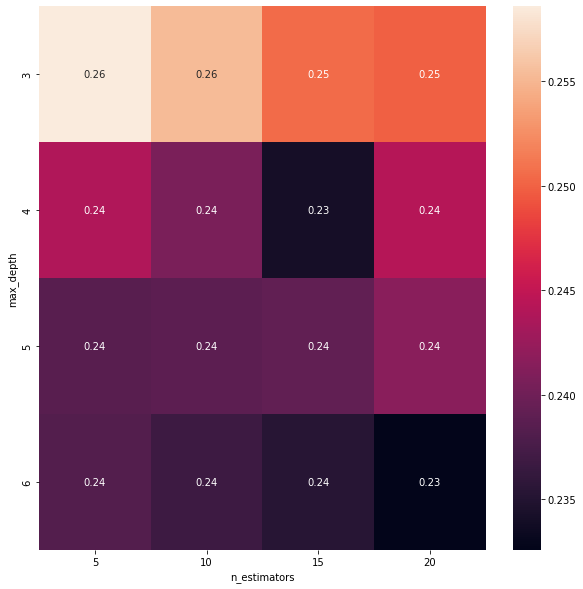

In [35]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

Best value for number of estimators=3 with accuracy=25.71%

In [36]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 3, n_estimators = 5)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  25.717703349282296


### <font color='royalblue'> Gradient Tree Boosting | PCA Abalone Dataset

{'max_depth': 3, 'n_estimators': 20}
Best CV score is  0.25890908765428783


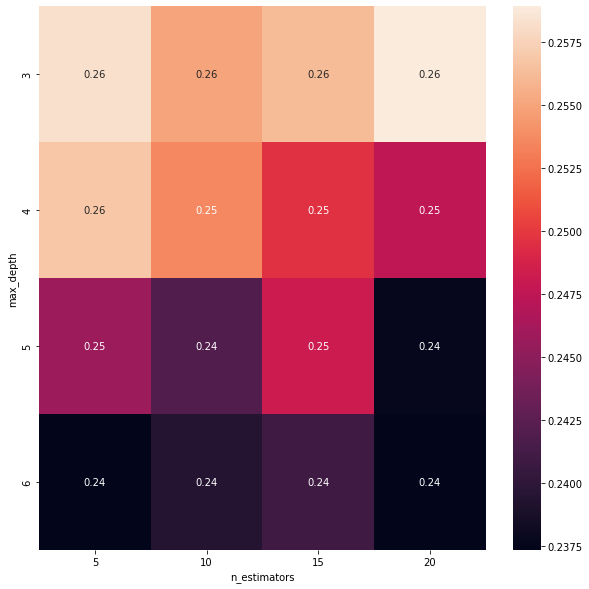

In [37]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [38]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 3, n_estimators = 5 )
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  25.478468899521534


Best value for number of estimators=20  with accuracy=25.47%

### <font color='royalblue'> Gradient Tree Boosting | LDA Abalone Dataset

{'max_depth': 3, 'n_estimators': 20}
Best CV score is  0.24542887319531342


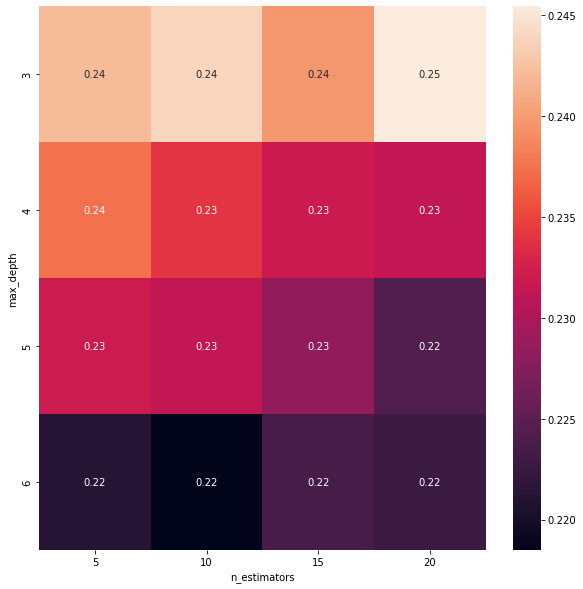

In [39]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [40]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 3  , n_estimators = 20)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  28.11004784688995


Best value for number of estimators=20  with accuracy=28.11%

OBSERVATIONS:
Gradient Tree Boosting
1. Raw Abalone data ---- No of estimators = 03 , Accuracy = 25.71%
2. PCA Abalone data ---- No of estimators = 20 , Accuracy = 25.47%
3. LDA Abalone data ---- No of estimators = 20 , Accuracy = 28.11%

# Wine Dataset
## Importing libraries

In [41]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score,roc_auc_score
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [42]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r]).reset_index()

X=wine.drop('quality',axis=1)
Y=wine['quality'].values

## Preliminary analysis on the data

(array([  30.,  216., 2138., 2836., 1079.,  193.,    5.]),
 array([3.        , 3.85714286, 4.71428571, 5.57142857, 6.42857143,
        7.28571429, 8.14285714, 9.        ]),
 <BarContainer object of 7 artists>)

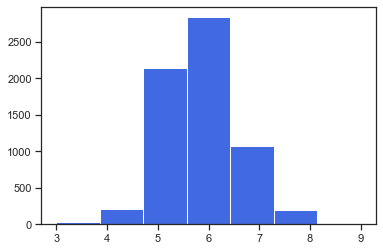

In [43]:
plt.hist(wine['quality'],bins=len(wine['quality'].unique()),color="royalblue")

# Normalization

Min-max normalization is used to scale the data such that the minimum value of the feature is set to 0 and the maximum value of the feature is set to 1

In [44]:
#Normalizing data using Min-Max method
wine_MinMax = wine[:].copy()
for d in wine_MinMax[:]:
    if d in ['quality']:
        continue
    wine_MinMax[d] = (wine_MinMax[d] - wine_MinMax[d].min()) / (wine_MinMax[d].max() - wine_MinMax[d].min())

# KNN with Min-Max Normalization
## Data preparation

Performing K-NN classfier using Defaults values, Manhattan distance & Euclidean distance to derive k-value of the best performance 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Preparing the data
X = wine_MinMax
drop_columns = ['quality']
y = wine['quality']
X = X.drop(columns = drop_columns)

#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

## KNN with default parameters

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  55.15384615384615


Best performance is  69  at k = 29 | weights = distance | distance = Manhattan


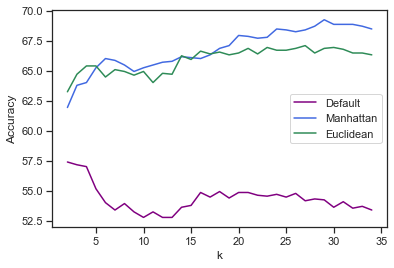

In [47]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(2,35))
m_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    m_acc_default.append(accuracy)
plt.plot(k_list, m_acc_default,color="purple")


#KNN for Manhatten distance
m_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'distance'
    m_acc_manhatten.append(accuracy)
plt.plot(k_list, m_acc_manhatten,color="royalblue")



#KNN for Euclidean distance
m_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'distance'
    m_acc_euclidean.append(accuracy)
plt.plot(k_list, m_acc_euclidean,color="seagreen")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')

print("Best performance is ",round(perf['Acc'])," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

Using Manhattan Distance metric we get the highest accuracy of 69% for K=29. Manhattan Distance is used to calculate the distance between two data points in a grid-like path

# Best performing KNN configuration

Selecting the Best Value for K which provides best accuracy scores

In [48]:
knn = KNeighborsClassifier(n_neighbors=29, weights = 'distance', p = 1, metric ='minkowski')
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print(accuracy)

69.23076923076923



The value K=29 provides an overall accuracy of 69.23

# 1. Representation Learning

## PCA
PCA is an unsupervised form of learning hence, we drop the target variables and carry out PCA on the remaining 11 attributes to find principal components with highest cumulative covariance.

Text(0.5, 1.0, 'Scree plot')

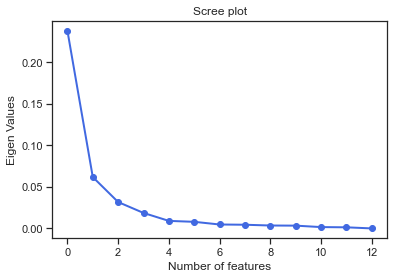

In [49]:
pca_model = PCA()
pca_model.fit(X_train)
fig = plt.figure(figsize=(6,4))
plt.plot(pca_model.explained_variance_ ,'o-', linewidth=2, color='royalblue')
plt.xlabel("Number of features")
plt.ylabel("Eigen Values")
plt.title("Scree plot")


The above plot indicates the Eigen values w.r.t number of features. As the number of Features increases the Eigen value decreased and reached solidity beyond 4 features.

[0.32279011 0.2374186 ]


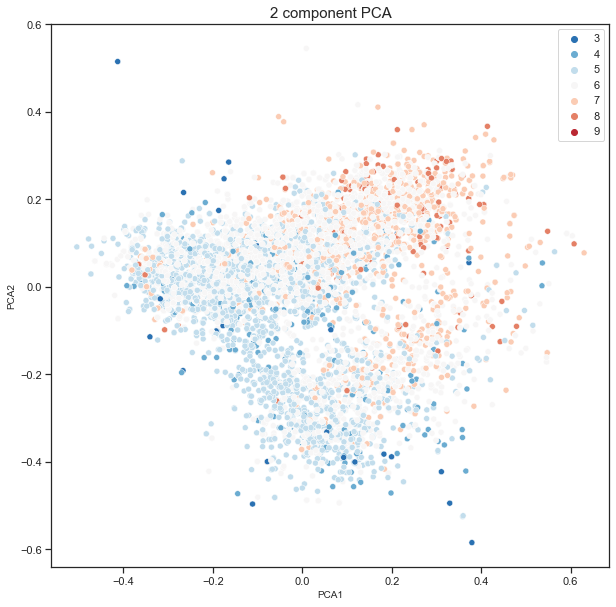

In [50]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' ]
pca_model_2dims = PCA(n_components=2)
pca_model_2dims.fit(X_train[D])
X2d = pca_model_2dims.transform(X[D])
wine_2d_pca = pd.DataFrame(X2d, columns = ["PCA1", "PCA2"])
wine_2d_pca["Label"] = wine["quality"]
fig = plt.figure(figsize = (10,10))
sns.scatterplot(x = wine_2d_pca["PCA1"].values, y = wine_2d_pca["PCA2"].values, hue = wine_2d_pca["Label"].values, palette = sns.color_palette("RdBu_r", 7))
plt.xlabel('PCA1', fontsize = 10)
plt.ylabel('PCA2', fontsize = 10)
plt.title('2 component PCA', fontsize = 15)
print(pca_model_2dims.explained_variance_ratio_)

The scree plot is a plot between the number of features and the magnitude of the eigen values which explains the quantum of spread along a particular principle component. Based on this plot,the datapoints are wide spread and portrays that the first two components adds up to only 55% of the total features and hence it may not be efficient and other PCA components may have to be added.

## TSNE

T-SNE is another dimensionality reduction concept that is well suited to effectively visualize high dimensional data. Since us humans can visualize and discern data in a 2-D or 3-D space plots the natural choice for dimension is either 2 or 3. For our experimentation, we'll primarily be using n_components set at 2 because of the following reasons,

It is convenient to visualize and analyze points in a 2D plots

Easy to work with 2D plots without having to expend too much on computing

<AxesSubplot:>

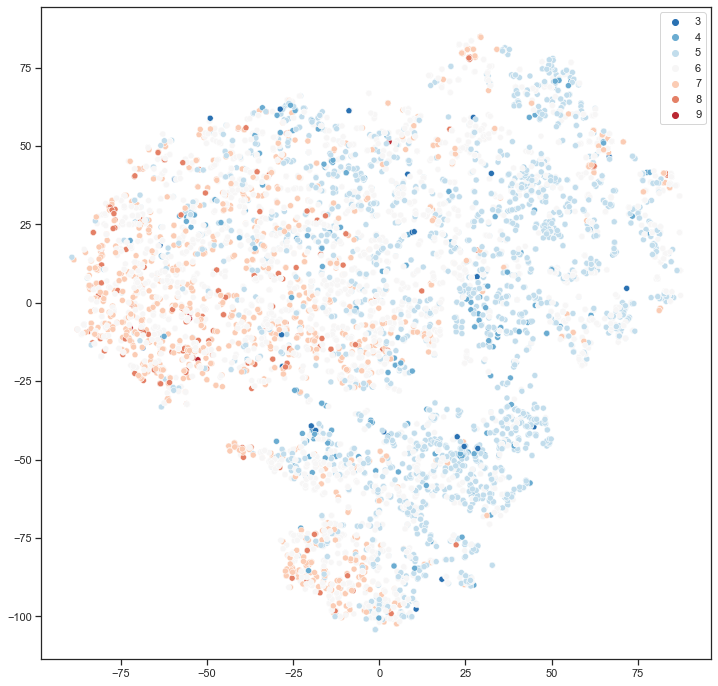

In [51]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

tsne_2d = TSNE(n_components=2)
X2d_tsne = tsne_2d.fit_transform(X[D])

wine_2d_tsne = pd.DataFrame(X2d_tsne, columns = ["TSNE1", "TNSE2"])
wine_2d_tsne["Label"] = wine["quality"]
fig = plt.figure(figsize = (12,12))
sns.scatterplot(x = wine_2d_tsne["TSNE1"].values, y = wine_2d_tsne["TNSE2"].values, hue = wine_2d_tsne["Label"].values, palette = sns.color_palette("RdBu_r", 7))



Feature of t-SNE is a tuneable parameter, “perplexity,” which says how to balance attention between local and global aspects of your data. The parameter is a guess about the number of close neighbors each point has. The results of the T-SNE shows evident grouping between classes however it is not distinct and difficult to infer from the plot.

## LDA

Linear Discriminant Analysis (LDA) is a supervised approach for identifying the linear discriminants that reflect the axes that optimise separation between various classes. Each class is given a Gaussian density by the model, which assumes that all classes have the same covariance matrix.


<AxesSubplot:>

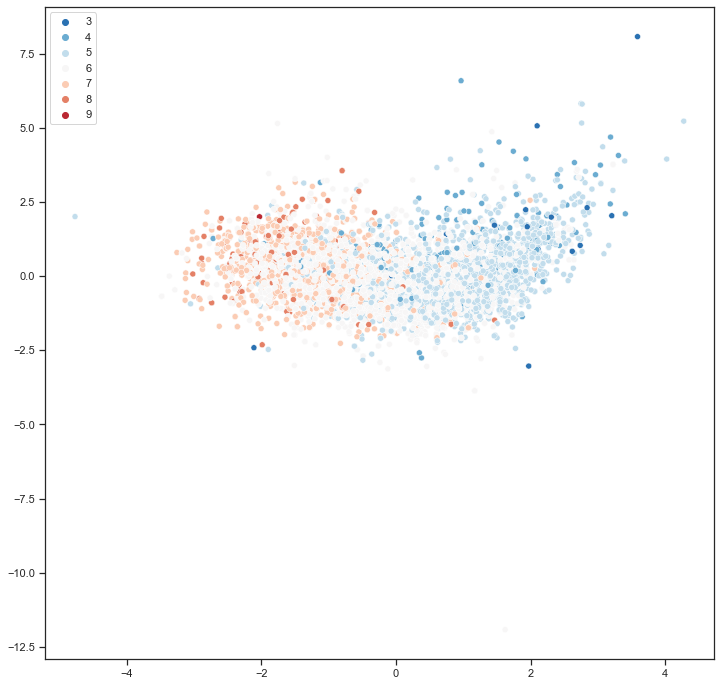

In [52]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

lda_2d = LDA(n_components=2)
X2d_lda = lda_2d.fit_transform(X[D], y = y)

wine_2d_lda = pd.DataFrame(X2d_lda, columns = ["LDA1", "LDA2"])
wine_2d_lda["Label"] = wine["quality"]
fig = plt.figure(figsize = (12,12))
sns.scatterplot(x = wine_2d_lda["LDA1"].values, y = wine_2d_lda["LDA2"].values, hue = wine_2d_lda["Label"].values, palette = sns.color_palette("RdBu_r", 7))





LDA focuses on the seperation of the different classes and it is evident in the above plot.

### KNN performance by varying dimensions in PCA

Text(0, 0.5, 'Accuracy')

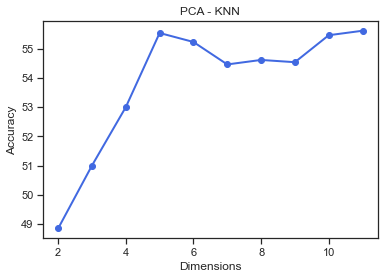

In [53]:
dims = []
acc = []
for d in range(2,len(D)+1):
    dims.append(d)
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train[D])
    Xnew = pca_model.transform(X[D])
    Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=0.2,random_state=27)
    
    knn = KNeighborsClassifier(n_neighbors=26, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(Xtrain, ytrain.values.ravel())
    y_pred = knn.predict(Xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)*100
    acc.append(accuracy)

plt.plot(dims,acc, 'o-', linewidth=2, color='royalblue')
plt.title("PCA - KNN")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")

The accuracy for 5 dimensions for the KNN-PCA is 56%


### KNN performance by varying dimensions in LDA 

Text(0, 0.5, 'Accuracy')

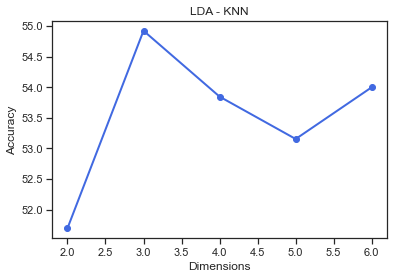

In [54]:
dims = []
acc = []
for d in range(2,7):
    dims.append(d)
    lda_model = LDA(n_components=d)
    Xnew = lda_model.fit_transform(X[D], y = y)
    Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=0.2,random_state=27)
    
    knn = KNeighborsClassifier(n_neighbors=26, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(Xtrain, ytrain.values.ravel())
    y_pred = knn.predict(Xtest)
    accuracy = metrics.accuracy_score(ytest, y_pred)*100
    acc.append(accuracy)

plt.plot(dims,acc, 'o-', linewidth=2, color='royalblue')
plt.title("LDA - KNN")
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")

The accuracy for 3 dimensions for the LDA-KNN is 54.8%

# Dataset - Wine

In [55]:
pca_dim = 5
lda_dim = 3
pca_model = PCA(n_components = pca_dim)
lda_model = LDA(n_components = lda_dim)

# Raw data
X_raw = X.to_numpy()
y_raw = y.to_numpy()

#Best PCA
X_pca = pca_model.fit_transform(X)

#Best LDA
X_lda = lda_model.fit_transform(X,y)

# 2. Naive Bayes
## Multinomial Naive Bayes

Original Feature Space is used for this classification.
Hyper parameter tuning is performed using 5-fold cross validation on each label.

Naive Bayes classifier which uses a multinomial distribution for each of the features is Multinomial NB. It is inefficient when the datasets are imbalanced. 

### <font color='royalblue'> Multinomial NB | Raw Wine dataset

In [56]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
for train_idx, test_idx in kf.split(X_raw,y_raw):
    xtrain = X_raw[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_raw[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Multinomial NB | Raw dataset | Wine | Accuracy : ", sum(acc)/len(acc))
        

Multinomial NB | Raw dataset | Wine | Accuracy :  47.03685675371587


### <font color='royalblue'> Multinomial NB | PCA Wine dataset

In [57]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca_scaled = scaler.transform(X_pca)
for train_idx, test_idx in kf.split(X_pca_scaled,y_raw):
    xtrain = X_pca_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_pca_scaled[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Multinomial NB | PCA dataset | Wine | Accuracy : ", sum(acc)/len(acc))

Multinomial NB | PCA dataset | Wine | Accuracy :  43.650595132350325


### <font color='royalblue'> Multinomial NB | LDA Wine dataset

In [58]:
kf = KFold(n_splits=3, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_lda)
X_lda_scaled = scaler.transform(X_lda)
for train_idx, test_idx in kf.split(X_lda_scaled,y_raw):
    xtrain = X_lda_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_lda_scaled[test_idx]
    ytest = y_raw[test_idx]
    mnb_raw = MultinomialNB()
    mnb_raw.fit(xtrain, ytrain)
    ypred = mnb_raw.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Multinomial NB | LDA dataset | Wine | Accuracy : ", sum(acc)/len(acc))

Multinomial NB | LDA dataset | Wine | Accuracy :  43.6507591250319


## Complement Naive Bayes 

### <font color='royalblue'> Complement NB | Raw Wine dataset

In [59]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
for train_idx, test_idx in kf.split(X_raw,y_raw):
    xtrain = X_raw[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_raw[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | Raw dataset | Wine | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | Raw dataset | Wine | Accuracy :  43.604666311363765


### <font color='royalblue'> Complement NB | PCA Wine dataset

In [60]:
kf = KFold(n_splits=5, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca_scaled = scaler.transform(X_pca)
for train_idx, test_idx in kf.split(X_pca_scaled,y_raw):
    xtrain = X_pca_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_pca_scaled[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | PCA dataset | Wine | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | PCA dataset | Wine | Accuracy :  39.74158820394386


### <font color='royalblue'> Complement NB | LDA Wine dataset

In [61]:
kf = KFold(n_splits=3, random_state=26, shuffle=True)
acc = []
scaler = MinMaxScaler()
scaler.fit(X_lda)
X_lda_scaled = scaler.transform(X_lda)
for train_idx, test_idx in kf.split(X_lda_scaled,y_raw):
    xtrain = X_lda_scaled[train_idx]
    ytrain = y_raw[train_idx]
    xtest = X_lda_scaled[test_idx]
    ytest = y_raw[test_idx]
    cmp_ = ComplementNB()
    cmp_.fit(xtrain, ytrain)
    ypred = cmp_.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, ypred)*100
    acc.append(accuracy)
    
print("Complement NB | LDA dataset | Wine | Accuracy : ", sum(acc)/len(acc))
    

Complement NB | LDA dataset | Wine | Accuracy :  42.95843027202543


Multinomial naive bayes outperforms complement naive bayes with the all datasets.This may be contradictory to the fact that complement NB performs better with unbalanced dataset in this scenario owing to the following reasons:
Nature of the datasets
Non-Removal of Outliers
Z-scaling could not be performed due to occurances of negative values. Hence, Min-Max scaling was performed

# 3. Decision Tree Classification

Original Feature Space is used for this classification.

Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for Max Depth

{'max_depth': 10}
0.5568555193603316


Text(0, 0.5, 'Accuracy')

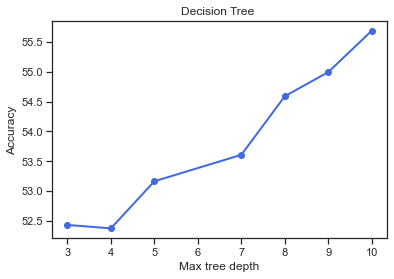

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score']*100,  'o-', linewidth=2, color='royalblue')
plt.title("Decision Tree ")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")

Therefore, Max Depth value of 10 gives the best accuracy of 55.68 %.
With reference to the plot the as the Depth of tree increases the accuracy of the classfier also increases Linearly

52.307692307692314


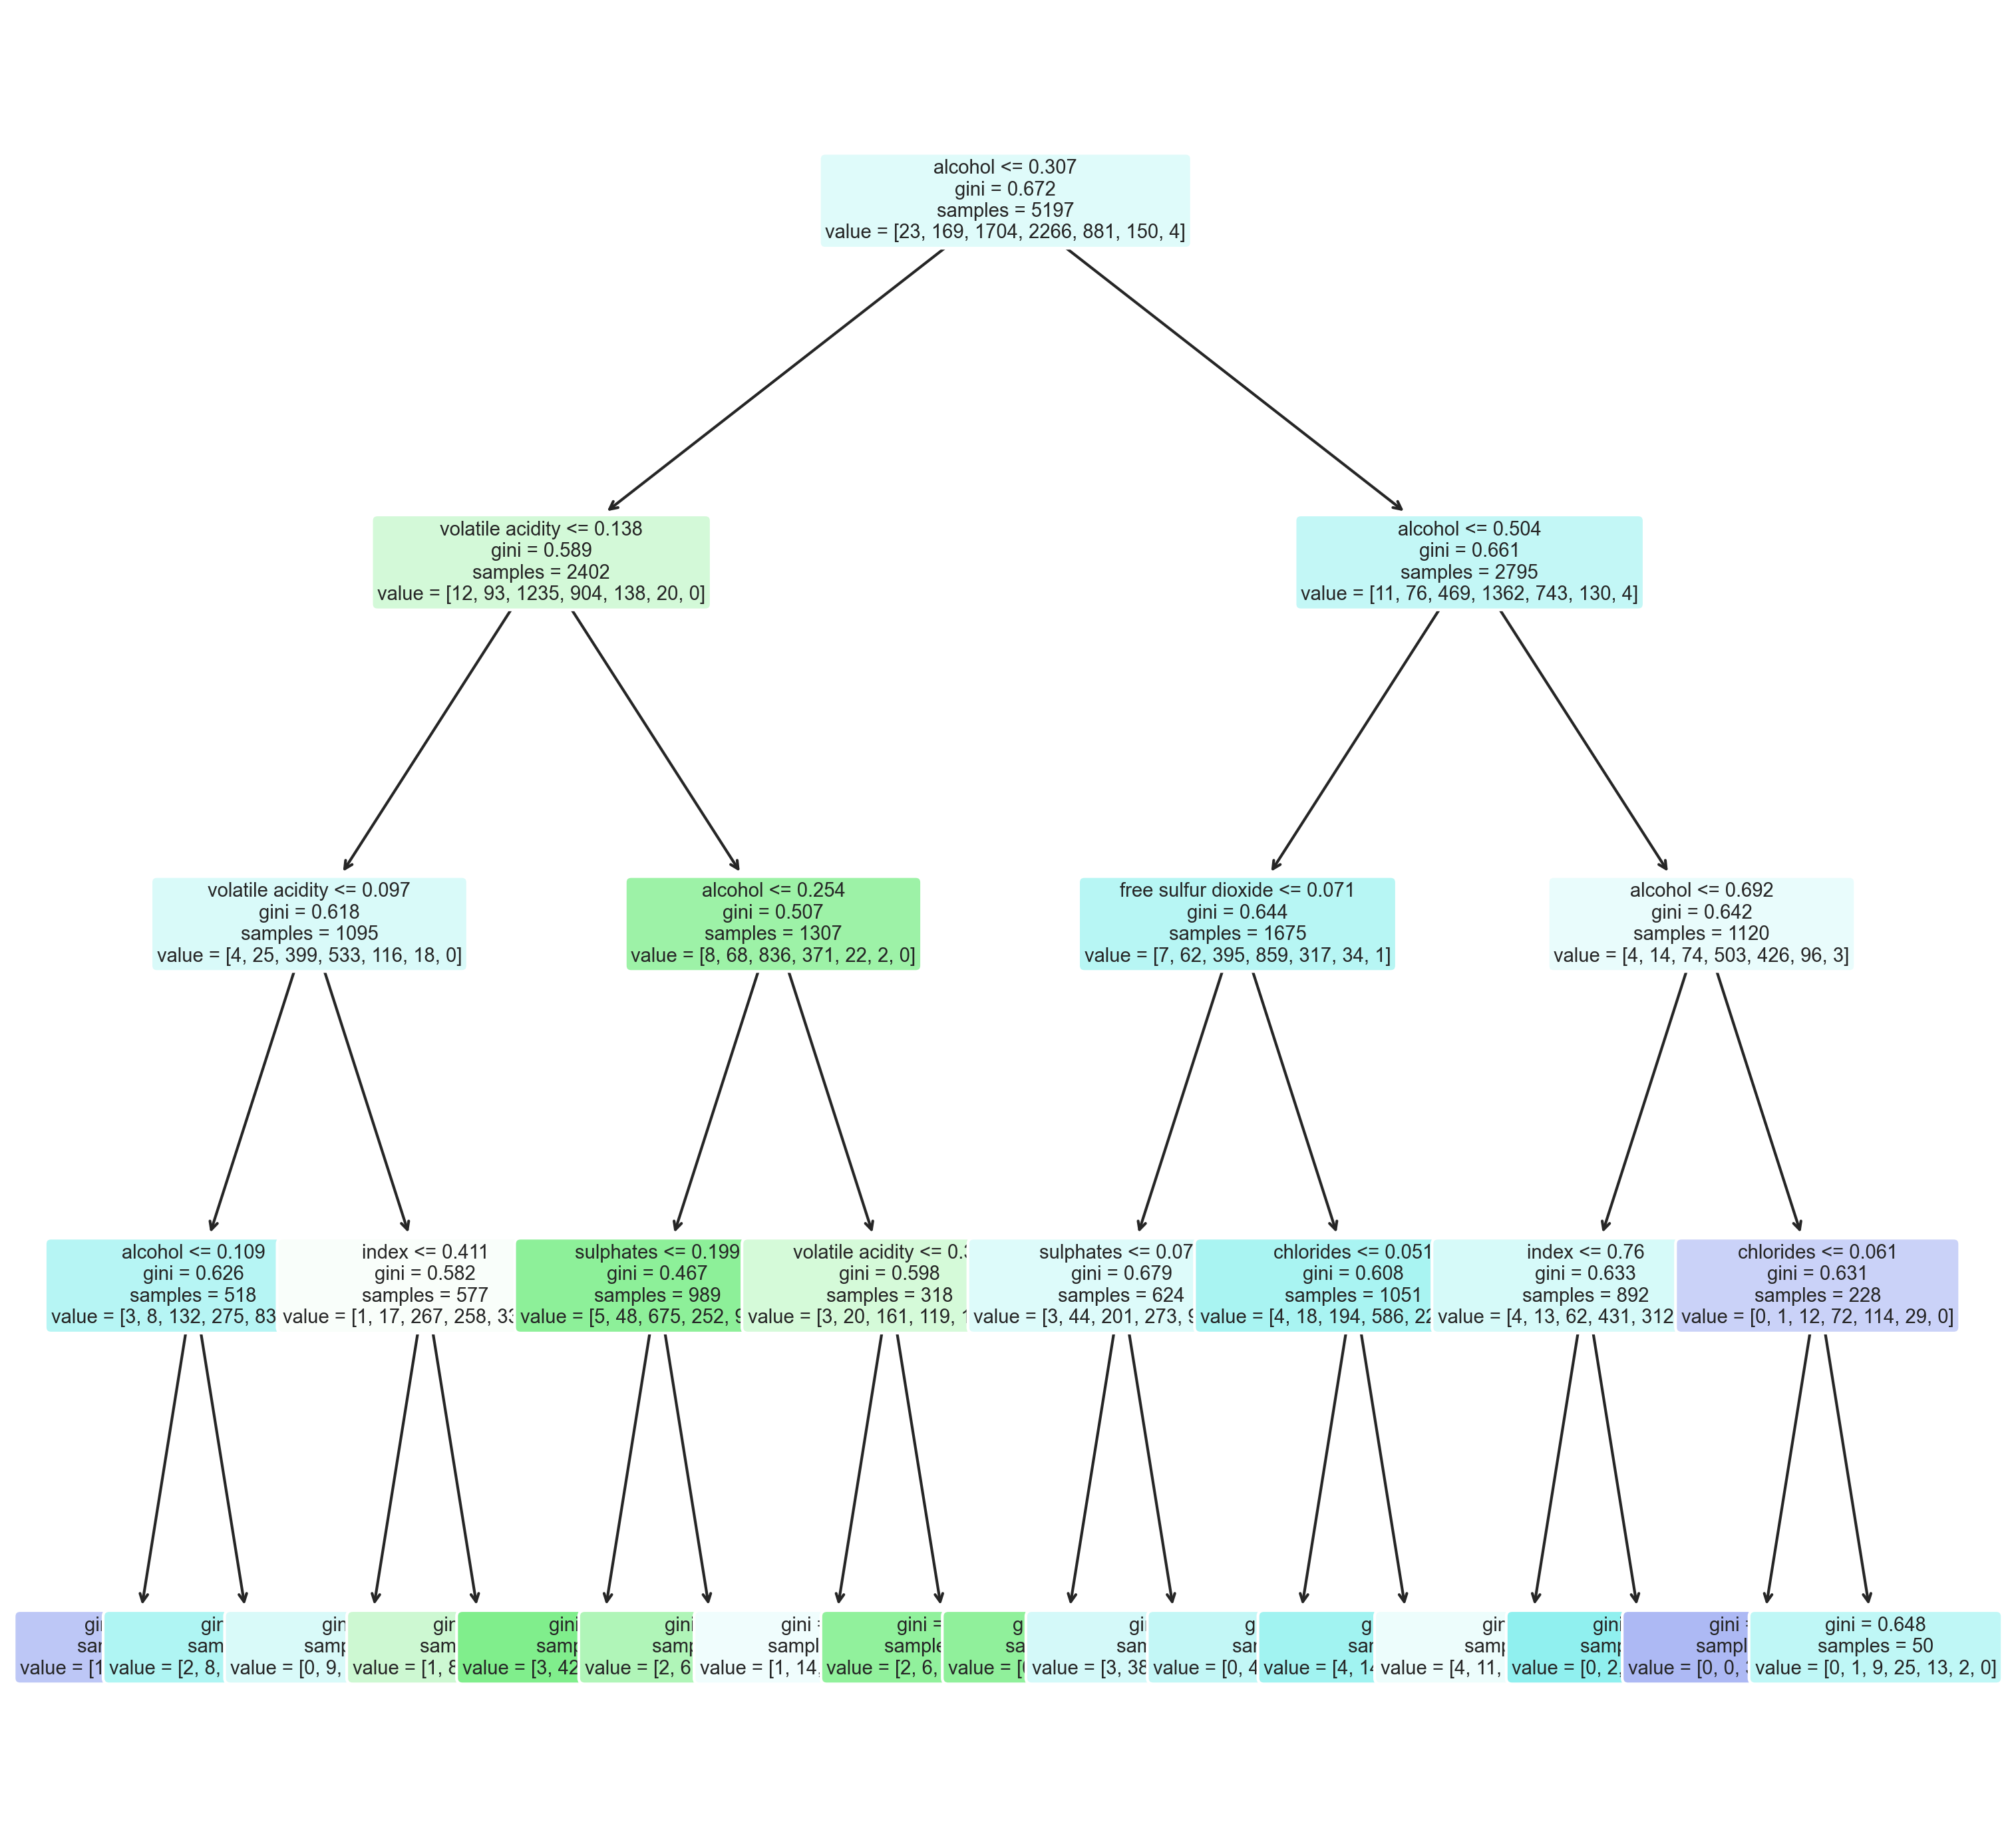

In [63]:
from sklearn import tree
dtree = DecisionTreeClassifier(random_state=27, max_depth = 4)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print(accuracy)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=300)
tree.plot_tree(dtree,feature_names=list(X.columns),filled=True,fontsize=7,rounded=True)
#plt.figure()
plt.show()

We can observe from the splitting pattern that, Gini Impurity is preferred to Information Gain because it does not contain logarithms which are computationally intensive. For each split, the Gini Impurity of each child node is individually calculated. The split with the lowest value of Gini Impurity is selected. We can observe that the root node was first split at alcohol <=0.307 and gini impurity value of 0.672 .Next split is at volatile acidity <= 0.138 on the left and alcohol <= 0.504 on the right which is further split into volatile acidity,alcohol and free sulphur dioxide. The splitting is balanced with continous and regularised splitting at nodes. This splitting continues similarly until each of the resulting child nodes end up with 2 leaf nodes. In the final splitting, the pattern that can be observed is that the final child node splits are either on alcohol, sulphates, volatile acidity and chlorides on every branch. An interesting observation is that these features were the subset of features selected to perform PCA.


### <font color='royalblue'>Decision Tree | PCA WINE DATASET

{'max_depth': 10}
0.5385742577922559


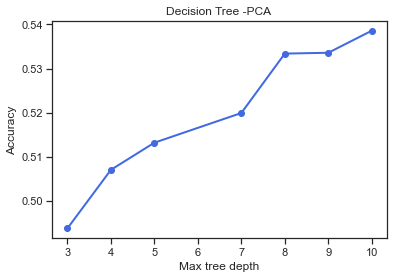

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score'],'o-', linewidth=2, color='royalblue')
plt.title("Decision Tree -PCA ")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")

dtree = DecisionTreeClassifier(random_state=27, max_depth = 10)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100


With the above plot Max Depth value of 10 gives the best accuracy of 53.85%. With reference to the plot above as there is linear increase in Accuracy with respect to depth of the tree

### <font color='royalblue'>Decision Tree | LDA WINE DATASET
    
Original Feature Space is used for this classification
    
Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for Max Depth

{'max_depth': 10}
0.5534002739320353
Test Accuracy is  54.307692307692314


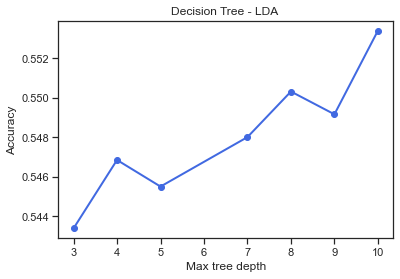

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 7, 8, 9, 10]}
tree = DecisionTreeClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
plt.plot( param_grid['max_depth'],grid_search.cv_results_['mean_test_score'],'o-', linewidth=2, color='royalblue')
plt.title("Decision Tree - LDA ")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy")

dtree = DecisionTreeClassifier(random_state=27, max_depth = 10)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

With the above plot Max Depth value of 10 gives the best accuracy of 55.41%. With reference to the plot above as there is linear increase in Accuracy with respect to depth of the tree. There is a difference in the above case where a decrease in the accuracy is observed at tree depth value of 5.

# Random Forest

Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for number of trees and Max Depth

{'max_depth': 10, 'n_estimators': 75}
Best CV score is  0.6338235729621677


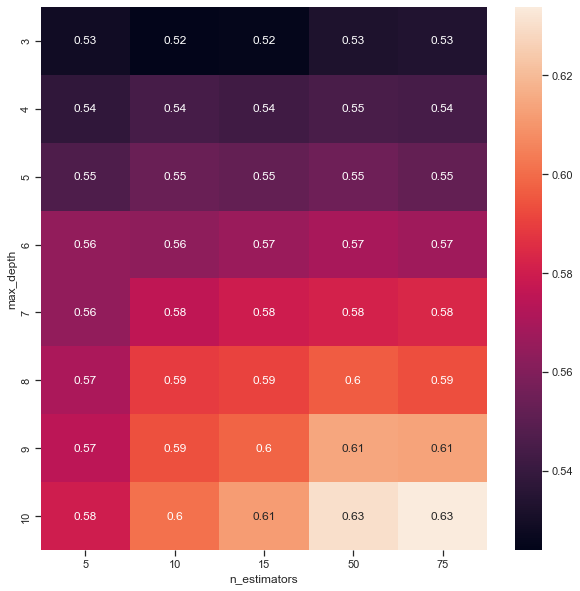

In [66]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [67]:
dtree = RandomForestClassifier(random_state=27, max_depth = 10, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  64.38461538461539


We can conclude from the heat map that max depth of 10 with 75 n-estimators provides the best accuracy of 64.38 %
### <font color='royalblue'>Random Forest | PCA WINE DATASET
    


{'max_depth': 10, 'n_estimators': 75}
Best CV score is  0.5828370474568743


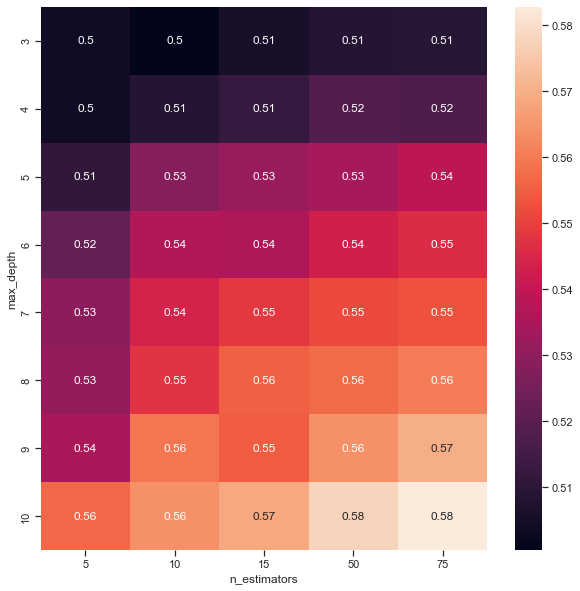

In [68]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [69]:
dtree = RandomForestClassifier(random_state=27, max_depth = 10, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  58.46153846153847


We can conclude from the heat map that max depth of 10 with 75 n-estimators provides the best accuracy of 58.46 %
### <font color='royalblue'> Random Forest Classification | LDA Wine dataset

{'max_depth': 10, 'n_estimators': 50}
Best CV score is  0.5899540978751758


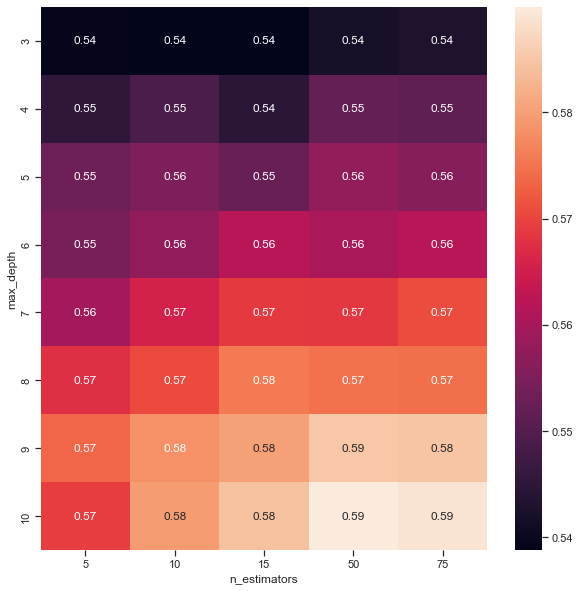

In [70]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],'n_estimators' :[5, 10, 15, 50,75]}
tree = RandomForestClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [71]:
dtree = RandomForestClassifier(random_state=27, max_depth = 10, n_estimators = 50)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  58.61538461538461


We can conclude from the heat map that max depth of 10 with 75 n-estimators provides the best accuracy of 58.76 %

# Gradient Boosting

Hyper parameter tuning is performed using 5-fold cross validation on each label to evaluate the best value for number of estimators

{'max_depth': 7, 'n_estimators': 20}
Best CV score is  0.6270844747168135


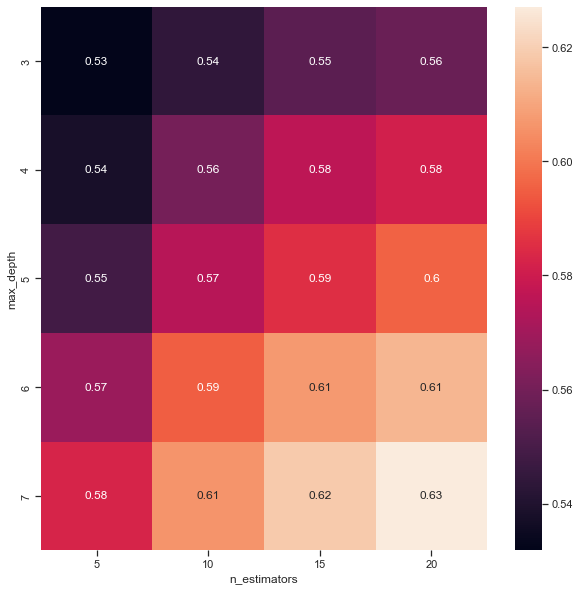

In [72]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6, 7],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [73]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 7, n_estimators = 5)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  58.07692307692308


Best value for number of estimators=20 with accuracy= 55 % 

### <font color='blue'> Gradient Tree Boosting | PCA Wine Dataset

{'max_depth': 6, 'n_estimators': 20}
Best CV score is  0.5645520841045384


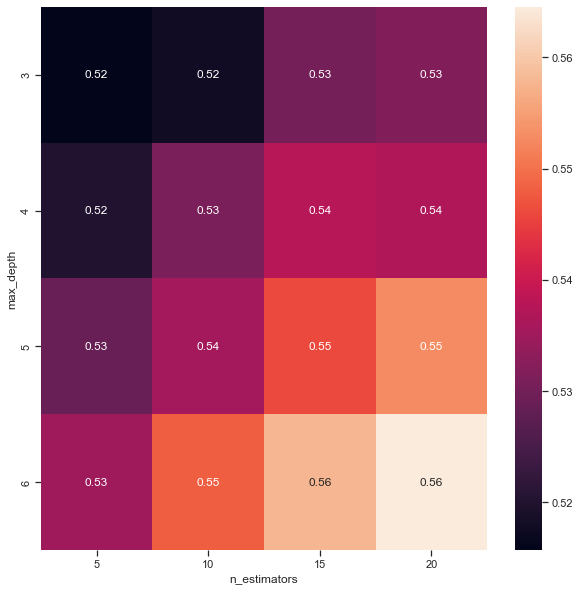

In [74]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [75]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 6, n_estimators = 5 )
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  53.15384615384615


Best value for number of estimators=20 with accuracy= 55.15 %

### <font color='blue'> Gradient Tree Boosting | LDA Wine Dataset

{'max_depth': 6, 'n_estimators': 20}
Best CV score is  0.5753309395128452


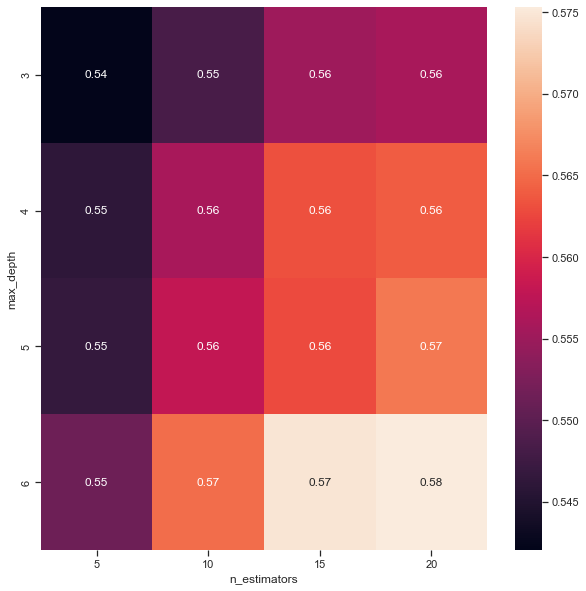

In [76]:
# find best value for max depth & number of trees parameters using gridsearchcv
X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.2,random_state=27)
param_grid = {'max_depth': [3, 4, 5, 6],'n_estimators' :[5, 10, 15, 20]}
tree = GradientBoostingClassifier(random_state=27)
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best CV score is ",grid_search.best_score_)

plt.figure(figsize = (10,10))
cv_score = grid_search.cv_results_['mean_test_score']
data1 = pd.DataFrame(grid_search.cv_results_['params'])
data1['cv_score'] = cv_score
data_pivoted = data1.pivot("max_depth", "n_estimators", "cv_score")
sns.heatmap(data_pivoted, annot = True)
plt.show()

In [77]:
dtree = GradientBoostingClassifier(random_state=27, max_depth = 6  , n_estimators = 20)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, ypred)*100
print("Test Accuracy is ", accuracy)

Test Accuracy is  57.230769230769226



Test Accuracy is  56.84615384615385
Best value for number of estimators=20 with accuracy= 56.84 % 

OBSERVATIONS:
Gradient Tree Boosting
1. Raw Wine data ---- No of estimators = 20 , Accuracy = 55.00%
2. PCA Wine data ---- No of estimators = 20 , Accuracy = 55.15%
3. LDA Wine data ---- No of estimators = 20 , Accuracy = 56.84%

#### Abalone Dataset
|Classifier | Setting | Abalone-raw | Abalone-pca | Abalone-lda |
|------------|-----------|---------------|-------------|---------------|
|kNN | k = 35 | 26.91 % | 25.35 % | 28.5 % |
|Multinomial Naive Bayes|MultinomialNB| 21.33 % | 16.83 % | 16.49 % |
|Complement Naive Bayes|ComplementNB| 18.3 % | 17.26 % | 21.49 %|
|Decision Tree Classifier| Grid Search CV=5 |26.80 % | 25.20 % | 25.83 %|
|Random Forest Classifier | Grid Search CV=5 | 27.63 % | 26.43 % | 26.91 % |
|Gradient Tree Boosting| Grid Search CV=5 | 25.71 % | 25.47 % | 28.11 % |


#### Wine Dataset
|Classifier | Setting | Wine-raw | Wine-pca | Wine-lda |
|------------|-----------|---------------|-------------|---------------|
|kNN | k = 29 | 69.23 % | 56.00 % | 54.8 % |
|Multinomial Naive Bayes|MultinomialNB| 47.03 % | 43.63 % | 43.65 %|
|Complement Naive Bayes|ComplementNB| 43.60 % | 39.74 % | 42.95 %|
|Decision Tree Classifier| Grid Search CV=5 |55.68 % | 53.85 % | 55.41 %|
|Random Forest Classifier | Grid Search CV=5 | 64.38 % | 58.46 % | 58.76 %|
|Gradient Tree Boosting| Grid Search CV=5 | 55.00 % | 55.15 % | 56.84 %|

### ABALONE DATASET:

1. For the abalone dataset, the KNN classifier performs the best with 26.91% accuracy in the raw-dataset and 25.35% and 28.5% for PCA and LDA respectively.
2. With the aid of dimensionality reduction, accuracy results portrays evident increase in the PCA and LDA datasets when the complement Naive bayes is applied when compared with raw dataset
3. The same scenario occurs in the case of gradient tree boosting wherein the accuracy increases.

### WINE DATASET

1. For the wine dataset, the the KNN classifier performs the best with 69.23% accuracy in the raw-dataset and 56% and 54.8% for PCA and LDA respectively.
2. With the aid of dimensionality reduction, accuracy results portrays decrease in the PCA and LDA datasets when the KNN or Random Forest Classifier is applied when compared with raw dataset.

# References

[1]. Min-Max Scalar: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[2]. PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[3]. How to use PCA: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

[4]. LDA: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

[5]. T-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

[6]. PCA Scree Plot: https://www.statology.org/scree-plot-python/

[7]. Niave Bayes: https://www.janbasktraining.com/blog/naive-bayes/

[8]. Gaussian naive bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

[9]. Multinomial naive bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

[10]. Complement naive bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB
        
[11]. Cross validation score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross%20val%20score#sklearn.model_selection.cross_val_score

[12]. Grid search cv: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[13]. Decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

[14]. Random forest classification: https://towardsdatascience.com/understanding-random-forest-58381e0602d2

[15]. Random forest classifier sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier

[16]. Gradient tree boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingClassifier

[17]. Gini impurity: https://www.analyticsvidhya.com/blog/2021/03/how-to-select-best-split-in-decision-trees-gini-impurity/

[18]. Max_depth limit for decision tree: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

[19]. Seaborn color palette used for scatterplot: https://seaborn.pydata.org/tutorial/color_palettes.html

[20]. Scatter plot used for 2D data visualization: https://seaborn.pydata.org/generated/seaborn.scatterplot.html